In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import parallel_coordinates

In [4]:
# teste = pd.read_csv('../data_science/turmas_2015-2017.csv')

# series_teste = (teste['ano'].map(str)+teste['periodo'].map(str))
# teste['periodoano'] = series_teste.astype(int)

# teste.to_csv('../data_science/turmas_new.csv')

In [2]:
dataFrame = pd.read_csv('../data_science/turmas_new.csv')

discA = 'CÁLCULO I'
discB = 'CÁLCULO II'

lista_disciplinas = ['CÁLCULO I', 'CÁLCULO II', 'CÁLCULO III']

dataFrame = dataFrame.dropna()

print(dataFrame.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'descricao', 'discente', 'id_turma',
       'media_final', 'codigo', 'nome', 'ano', 'periodo',
       'unidade_responsavel', 'id_curso', 'periodoano'],
      dtype='object')


#### Correlação

In [13]:
# correlação entre duas disciplinas
def correlacao(discA, discB):
    dataFrame = pd.read_csv('../data_science/turmas_new.csv')
    dataFrameA = dataFrame[dataFrame['nome'] == discA]
    dataFrameB = dataFrame[dataFrame['nome'] == discB]

    # Aprovados no DiscA
    dataFrameA = dataFrameA[dataFrameA['descricao'].str.contains('APROVADO')]

    series_aprovados = dataFrameA.discente.unique()

    df_finalB = pd.DataFrame()

    for dis in series_aprovados:
        linhas = dataFrameB[dataFrameB['discente'] == dis]
        linha = linhas[linhas['periodoano'] == linhas.periodoano.min()]

        df_finalB = pd.concat([df_finalB, linha])

    # concatenando das tabelas
    colunas = ['discente', 'media_final', 'nome']
    dataFrameA = dataFrameA[colunas]
    df_finalB = df_finalB[colunas]

    conc = pd.concat([dataFrameA, df_finalB])

    df = pd.crosstab(conc.discente, conc.nome, conc.media_final,aggfunc=np.mean)
    df = df.dropna()
    df_correlacao = df.corr()

    return df_correlacao[discA][discB]

In [81]:
df_retorno = pd.DataFrame(columns=lista_disciplinas)

# matriz de zeros
w, h = len(lista_disciplinas), len(lista_disciplinas)
content = [[0] * w for i in range(h)]
correlacoes = np.array(content, dtype='f')

# calculo das relacões sem repetição
for i in range(0, len(lista_disciplinas)):
    for j in range(0, len(lista_disciplinas)):
        if i==j:
            correlacoes[i][j] = 1
        if i<j:
            correlacoes[i][j] = correlacao(lista_disciplinas[i], lista_disciplinas[j])

In [84]:
df_retorno = pd.DataFrame(correlacoes,
                          columns=lista_disciplinas)
df_retorno = df_retorno.set_axis(lista_disciplinas, axis=0, inplace=False)
df_retorno
# df_retorno.set_axis(lista_disciplinas, axis=0, inplace=False)

,CÁLCULO I,CÁLCULO II,CÁLCULO III
CÁLCULO I,1.0,0.456186,0.452459
CÁLCULO II,0.0,1.000000,0.458779
CÁLCULO III,0.0,0.000000,1.000000


#### Coordenadas Paralelas

In [3]:
dataFrame = pd.read_csv('../data_science/turmas_new.csv')
dataFrame.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'descricao', 'discente', 'id_turma',
       'media_final', 'codigo', 'nome', 'ano', 'periodo',
       'unidade_responsavel', 'id_curso', 'periodoano'],
      dtype='object')

In [4]:
disciplinas = ['CÁLCULO I', 'CÁLCULO II', 'CÁLCULO III']

In [5]:
# Contando reprovações de media_final notnull
df_contagemRep = dataFrame[dataFrame['descricao'].str.contains('REPROVADO')]
df_contagemRep = df_contagemRep[df_contagemRep.media_final.notnull()]

colunas_1 = ['descricao', 'discente', 'media_final', 'id_turma', 'nome']
df_contagemRep = df_contagemRep[colunas_1].drop_duplicates()

# df_contagemRep[df_contagemRep.discente=='f3895ff9fc386821a519db524a8aeaac']
df_contagemRep = df_contagemRep[df_contagemRep['nome'].isin(disciplinas)]
df_contagemRep = df_contagemRep.groupby(['discente']).descricao.count().reset_index()
df_contagemRep.sort_values('descricao', ascending=False).head()

,discente,descricao
2050,d903aa4840276efef32badaa777ac42a,6
1698,b3141ec4bbcb82a33da7c7d9c73a691f,5
777,54c638989c2444abbbbfe98fa078915d,5
2271,ef9181bc5150462578a6ff0e59cc624a,5
1602,a8986898db5ebe12d23e1ec9e2b075c7,5


In [6]:
# Aprovados e não foram reprovados
series_Rep = df_contagemRep['discente']

df_NRep = dataFrame[dataFrame['descricao'].str.contains('APROVADO')]

# tirando os reprovados
df_NRep = df_NRep[~df_NRep['discente'].isin(series_Rep)]
df_NRep = df_NRep[df_NRep.media_final.notnull()]

colunas_2 = ['descricao', 'discente', 'media_final', 'id_turma', 'nome']
df_NRep = df_NRep[colunas_2].drop_duplicates()
df_NRep = df_NRep[df_NRep['nome'].isin(disciplinas)]
df_NRep.head()

,descricao,discente,media_final,id_turma,nome
79,APROVADO,bb67c2ca87d0e1fcf027b2f0f6df4221,8.5,1242602,CÁLCULO I
82,APROVADO,4847ea230075170dc33c8607eab37780,8.0,1242602,CÁLCULO I
83,APROVADO,d00171e04d77a7994414014d941baf8c,10.0,1242602,CÁLCULO I
84,APROVADO,87c8ed9b5ee46a87b620af169806703f,7.8,1242602,CÁLCULO I
85,APROVADO,3ff085f94a31cdddd21d355d0d8f6438,10.0,1242602,CÁLCULO I


In [7]:
# junta APROVADOS e REPROVADOS
aprovados = pd.DataFrame();
aprovados['discente'] = df_NRep['discente'];
aprovados['descricao'] = df_NRep['descricao'];

aprovados = aprovados.replace('APROVADO', 0)
aprovados = aprovados.replace('APROVADO POR NOTA', 0)

df_contagem = pd.concat([df_contagemRep, aprovados])

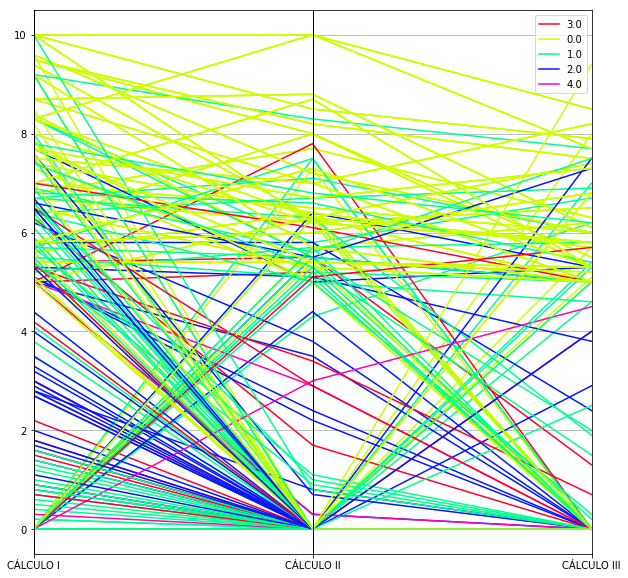

In [8]:
colunas = ['discente', 'nome', 'media_final']
# tirando duplicados e NaN
grafico = dataFrame[colunas].drop_duplicates().dropna()
grafico = grafico[grafico['nome'].isin(disciplinas)]

df_grafico = pd.crosstab(grafico.discente,grafico.nome,grafico.media_final,aggfunc=np.max).reset_index()
df_grafico = pd.merge(df_grafico, df_contagem, on='discente',how='left')

df_grafico= df_grafico.fillna(0)
#eixo = plt.gca()
plt.figure(figsize=(10,10))
df_grafico= df_grafico[['CÁLCULO I', 'CÁLCULO II', 'CÁLCULO III', 'descricao']]
parallel_coordinates(frame=df_grafico.head(300), class_column='descricao',colormap='gist_rainbow')
#eixo.legend_.remove()

In [11]:
np.array(df_grafico['CÁLCULO I'])

array([5.4, 0. , 9.5, ..., 4.6, 0. , 6. ])